# Tarea 1 PCA

Integrantes:



*   Israel García Ramírez
*   Mateo Sebastian Valencia Calvache


---

In [ ]:
import pandas as pd
import numpy as np

# **Ejercicio 2.**


---


Considera la matriz
\begin{equation}
X=
\begin{pmatrix}
-1 & 0 & 1\\
0 & -1 & 1
\end{pmatrix}
\end{equation}

Realiza un PCA realizando la descomposición espectral de la matriz de covarianza de $X$. Calcula la varianza total.

In [ ]:
import numpy as np
X=np.array([[-1,0,1],[0,-1,1]])
X

array([[-1,  0,  1],
       [ 0, -1,  1]])

Primero se preprocesan los datos. Se resta la media por columnas a los datos.

In [ ]:
X_media=X-np.mean(X,axis=0)
X_media

array([[-0.5,  0.5,  0. ],
       [ 0.5, -0.5,  0. ]])

Luego se calcula la matriz de covarianza $\Sigma_{xx}$.

In [ ]:
S=np.cov(X_media,rowvar=False)
S

array([[ 0.5, -0.5,  0. ],
       [-0.5,  0.5,  0. ],
       [ 0. ,  0. ,  0. ]])

Después se calculan los eigenvalores y eigenvectores asociados.

In [ ]:
eigen_val, eigen_vec = np.linalg.eigh(S)
eigen_val

array([0., 0., 1.])

In [ ]:
eigen_vec

array([[-0.70710678,  0.        , -0.70710678],
       [-0.70710678,  0.        ,  0.70710678],
       [-0.        ,  1.        ,  0.        ]])

Aplicando la Cámara de Weyl:
\begin{equation}
  \lambda_1 \geq \lambda_2 \geq ... \lambda_n
\end{equation}

In [ ]:
eigen_val_weyl=eigen_val[::-1]
eigen_val_weyl

array([1., 0., 0.])

In [ ]:
eigen_vec_weyl=eigen_vec[:,np.argsort(eigen_val)[::-1]]
eigen_vec_weyl

array([[-0.70710678,  0.        , -0.70710678],
       [ 0.70710678,  0.        , -0.70710678],
       [ 0.        ,  1.        , -0.        ]])

Utilizando 2 componentes principales.

In [ ]:
n_components = 2
eigenvector_2 = eigen_vec_weyl[:,0:n_components]
eigenvector_2

array([[-0.70710678,  0.        ],
       [ 0.70710678,  0.        ],
       [ 0.        ,  1.        ]])

Realizando la descomposición espectral para obtener la matriz reducida.

In [ ]:
X_reducida = np.dot(eigenvector_2.transpose(),X_media.transpose()).transpose()
X_reducida

array([[ 0.70710678,  0.        ],
       [-0.70710678,  0.        ]])

In [ ]:
import pandas as pd
principal_df = pd.DataFrame(X_reducida , columns = ['PC1','PC2'])
principal_df

,PC1,PC2
0,0.707107,0.0
1,-0.707107,0.0


Así los componentes principales son:
\begin{equation}
  \xi_1=0.0710678X_{11}+0X_{12}\\
  \xi_2=-0.70710678X_{21}+0X_{22}
\end{equation}

Además, la **Varianza Total** es:
\begin{equation}
  \lambda_1 + \lambda_2 + ... +\lambda_n = 1
\end{equation}

In [ ]:
sum(eigen_val)

1.0



---



# Ejercicio 3

In [ ]:
#Tenemos los datos
df=pd.read_csv('wine.data')
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
#Convertimos a arreglo
X=df.to_numpy()
np.mean(X)

64.19463115375302

In [ ]:
X

array([[1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.000e+00, 1.437e+01, 1.950e+00, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
X.shape

(177, 14)

In [ ]:
X_media=X-np.mean(X,axis=0)

In [ ]:
#Calculamos el PCA sin sklearn
S=np.cov(X_media,rowvar=False)
S

array([[ 5.99062661e-01, -2.01098164e-01,  3.77834489e-01,
        -1.02751027e-02,  1.32709938e+00, -2.18252440e+00,
        -3.48110234e-01, -6.54292822e-01,  4.70066127e-02,
        -2.18923344e-01,  4.83170577e-01, -1.09546418e-01,
        -4.29187853e-01, -1.53841134e+02],
       [-2.01098164e-01,  6.54171097e-01,  9.04975764e-02,
         4.69369158e-02, -8.18511460e-01,  2.96623909e+00,
         1.44175177e-01,  1.85883863e-01, -1.52687821e-02,
         5.89675173e-02,  1.03003738e+00, -1.39689715e-02,
         3.27443695e-02,  1.63267657e+02],
       [ 3.77834489e-01,  9.04975764e-02,  1.25286476e+00,
         5.07899043e-02,  1.06850761e+00, -7.78171867e-01,
        -2.33862243e-01, -4.57547336e-01,  4.06718541e-02,
        -1.39446938e-01,  6.50584636e-01, -1.43844547e-01,
        -2.89426785e-01, -6.67941936e+01],
       [-1.02751027e-02,  4.69369158e-02,  5.07899043e-02,
         7.56692476e-02,  4.09929122e-01,  1.11942925e+00,
         2.20882768e-02,  3.13400199e-02,  6.

In [ ]:
S.shape

(14, 14)

In [ ]:
eigen_val, eigen_vec = np.linalg.eigh(S)

In [ ]:
eigen_val

array([8.08932905e-03, 2.08789626e-02, 3.49478963e-02, 4.63443518e-02,
       8.67856906e-02, 1.11652291e-01, 1.55908935e-01, 2.86616079e-01,
       8.71509588e-01, 1.28979701e+00, 5.12939227e+00, 9.52691833e+00,
       1.70863581e+02, 9.91858285e+04])

In [ ]:
eigen_val[::-1]

array([9.91858285e+04, 1.70863581e+02, 9.52691833e+00, 5.12939227e+00,
       1.28979701e+00, 8.71509588e-01, 2.86616079e-01, 1.55908935e-01,
       1.11652291e-01, 8.67856906e-02, 4.63443518e-02, 3.49478963e-02,
       2.08789626e-02, 8.08932905e-03])

In [ ]:
eigen_vec = eigen_vec[:,np.argsort(eigen_val)[::-1]]

eigen_vec

array([[ 1.55124279e-03, -3.15432737e-03, -1.00574347e-01,
         1.47625764e-01, -2.18412277e-01,  1.69910339e-01,
         1.81882850e-01,  1.90301271e-01, -1.83725083e-01,
        -5.05206494e-01,  6.18184118e-01,  3.73582734e-01,
        -9.52967175e-02,  4.92346636e-02],
       [-1.64640028e-03, -7.17665214e-04, -1.98658968e-02,
         1.36740183e-01,  4.54191610e-02, -1.99462327e-01,
        -8.89824814e-01,  3.55581980e-01, -8.70657490e-02,
        -5.82035062e-02,  9.04106692e-02,  3.80491361e-02,
         4.52820016e-03,  1.47971477e-02],
       [ 6.73506707e-04, -2.50539607e-03, -1.24480733e-01,
         1.56650736e-01, -5.32963552e-01, -8.01427101e-01,
         1.45121435e-01, -7.56922538e-02, -1.18356188e-02,
         3.40264652e-02, -7.68956819e-03, -3.62207567e-02,
        -6.33184712e-02, -1.24533186e-02],
       [-1.94876719e-04, -4.67124259e-03, -5.14104489e-02,
        -1.21258683e-02,  2.54347275e-02, -4.16718311e-02,
        -5.12644298e-02, -1.49492275e-01, -7.

In [ ]:
n_components = 2
eigenvector_2 = eigen_vec[:,0:n_components]
eigenvector_2

array([[ 1.55124279e-03, -3.15432737e-03],
       [-1.64640028e-03, -7.17665214e-04],
       [ 6.73506707e-04, -2.50539607e-03],
       [-1.94876719e-04, -4.67124259e-03],
       [ 4.62714846e-03, -2.87367564e-02],
       [-1.74715140e-02, -9.99274600e-01],
       [-9.86351833e-04, -7.44756954e-04],
       [-1.55753943e-03,  4.56932866e-04],
       [ 1.22303371e-04,  1.34228446e-03],
       [-5.91287116e-04, -4.70862302e-03],
       [-2.33004374e-03, -1.54997593e-02],
       [-1.70868495e-04,  7.99499499e-04],
       [-6.85049512e-04,  4.34883705e-03],
       [-9.99829003e-01,  1.73603213e-02]])

In [ ]:
Y_r = np.dot(eigenvector_2.transpose(),X_media.transpose()).transpose()
Y_r

array([[-3.04899963e+02,  5.14076193e+00],
       [-4.39864419e+02,  6.24036973e+00],
       [-7.35040360e+02, -6.06511153e-01],
       [ 9.77749060e+00, -1.86054042e+01],
       [-7.05031571e+02, -6.59091383e-02],
       [-5.44777297e+02,  1.31881386e+01],
       [-5.50197839e+02, -1.17878435e+01],
       [-2.99840671e+02,  7.95201739e+00],
       [-2.99853054e+02,  6.86836534e+00],
       [-7.64883347e+02,  7.90510573e+00],
       [-5.34749397e+02,  1.39551162e+01],
       [-5.74643166e+02,  2.06571799e+01],
       [-4.04732057e+02,  1.58369134e+01],
       [-8.01858171e+02,  1.16871785e+01],
       [-5.65045215e+02, -2.56048099e+00],
       [-5.35176044e+02, -1.11431374e+01],
       [-3.85115063e+02, -8.75435291e+00],
       [-9.34921806e+02,  7.85750276e+00],
       [-1.00198310e+02, -1.45402591e+01],
       [-3.53843747e+01, -2.56887620e+01],
       [-2.49468301e+01, -1.94322345e+00],
       [-2.89895300e+02,  3.73412455e+00],
       [-2.69786117e+02,  9.34589612e+00],
       [-9.

In [ ]:
eigen_val_total = sum(eigen_val)

varianza_explicada = [(i/ eigen_val_total )*100 for i in eigen_val ]

varianza_explicada = np.round(varianza_explicada, 2)

varianza_explicada_acumulada = np.cumsum(varianza_explicada)

print("Varianza explicada: {}".format(varianza_explicada))

print("Varianza explicada acumulada: {}".format(varianza_explicada_acumulada))

Varianza explicada: [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 1.000e-02 1.000e-02 1.700e-01 9.981e+01]
Varianza explicada acumulada: [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 1.0e-02 2.0e-02 1.9e-01 1.0e+02]


In [ ]:
def PCA(X , num_componentes):

    X_media = X - np.mean(X , axis = 0)

    cov_mat = np.cov(X_media , rowvar = False)

    eigen_val , eigen_vec = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigen_val)[::-1]
    sorted_eigenval = eigen_val[sorted_index]
    sorted_eigenvec = eigen_vec[:,sorted_index]

    eigenvector_ = sorted_eigenvec[:,0:num_componentes]

    X_re = np.dot(eigenvector_.transpose() , X_media.transpose() ).transpose()

    return X_re

Una vez que cargamos los datos, obtenemos una tabla de 177 filas por 14 columnas.
Utilizamos una función para convertir la información a un arreglo y poder trabajarlo como tal.

En el proceso de hacer el PCA, realizamos la covarianza de la matriz de la media y con ello logramos una matriz cuadrada, de 14x14.

Con la varianza explicada acumulada podemos ver que necesitamos tomar 11 componentes para poder llegar al 100% y reducir la dimensión de la información que estamos manejando.



---



# Ejercicio 4

In [ ]:
#Generamos una muestra aleatoria de tamaño 99 a partir de una distribución
#gaussiana 3- dimensional
#Una de las variables tiene una varianza más grande que la de las demás
np.random.seed(1)

ejc=np.random.multivariate_normal((0,0,0),([1,0,0],[0,100,0],[0,0,5]),33)
ejc

array([[-5.28171752e-01,  1.62434536e+01, -1.36792893e+00],
       [-2.30153870e+00, -1.07296862e+01,  1.93511029e+00],
       [ 3.19039096e-01,  1.74481176e+01, -1.70211038e+00],
       [-2.06014071e+00, -2.49370375e+00,  3.26937274e+00],
       [ 1.13376944e+00, -3.22417204e+00, -8.58771644e-01],
       [-8.77858418e-01, -1.09989127e+01, -3.85561193e-01],
       [-1.10061918e+00,  4.22137467e-01,  1.30321444e+00],
       [ 5.02494339e-01,  1.14472371e+01,  2.01601814e+00],
       [-1.22890226e-01,  9.00855949e+00, -1.52886197e+00],
       [ 5.30355467e-01, -9.35769434e+00, -5.99015956e-01],
       [-6.87172700e-01, -6.91660752e+00, -8.87167856e-01],
       [-1.26645989e-02, -8.45205641e+00, -1.50095198e+00],
       [ 1.65980218e+00, -1.11731035e+01,  5.24169435e-01],
       [-8.87628964e-01,  7.42044161e+00, -4.28957336e-01],
       [ 5.08077548e-02, -7.47158294e+00,  3.78444354e+00],
       [ 2.10025514e+00, -6.36995647e+00,  4.26900002e-01],
       [ 3.00170320e-01,  1.20158952e+00

In [ ]:
ejc.shape

(33, 3)

In [ ]:
#Para realizar el PCA con sklearn
data = pd.DataFrame(ejc, columns=['columna_1', 'columna_2', 'columna_3'])
data

,columna_1,columna_2,columna_3
0,-0.528172,16.243454,-1.367929
1,-2.301539,-10.729686,1.935110
2,0.319039,17.448118,-1.702110
3,-2.060141,-2.493704,3.269373
4,1.133769,-3.224172,-0.858772
5,-0.877858,-10.998913,-0.385561
6,-1.100619,0.422137,1.303214
7,0.502494,11.447237,2.016018
8,-0.122890,9.008559,-1.528862
9,0.530355,-9.357694,-0.599016


In [ ]:
x = data.iloc[:,0:3]

pcadata = PCA(x , 2)

compprincipal = pd.DataFrame(pcadata , columns = ['PC1','PC2'])
compprincipal

,PC1,PC2
0,-17.243789,-2.024852
1,9.703055,1.502658
2,-18.450902,-2.332744
3,1.451054,2.751531
4,2.203989,-1.213224
5,9.987691,-0.745272
6,-1.449610,0.799080
7,-12.493640,1.458992
8,-10.010762,-2.082946
9,8.338534,-0.911257


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA

In [ ]:
X = data[['columna_1','columna_2','columna_3']]
y=X
target_names=[['columna_1','columna_2','columna_3']]

pca = PCA()
X_r = pca.fit(X).transform(X)

In [ ]:
#Encontramos los eigenvalores y los eigenvectores
X_r = pca.fit(X).transform(X)
print('\nEigenvalores \n%s' %pca.explained_variance_)
print('Eigenvectores \n%s' %pca.components_)


Eigenvalores 
[81.60485547  2.82531733  0.99943917]
Eigenvectores 
[[-0.00744405 -0.99990937 -0.01121773]
 [-0.04699901  0.01155549 -0.9988281 ]
 [-0.9988672   0.0069081   0.04708077]]


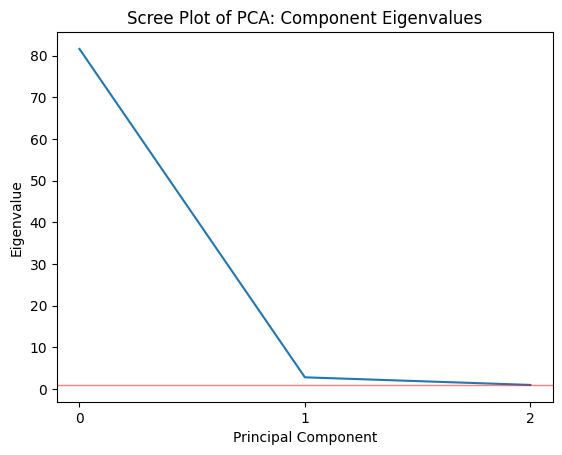

In [ ]:
#Gráfica Scree
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()

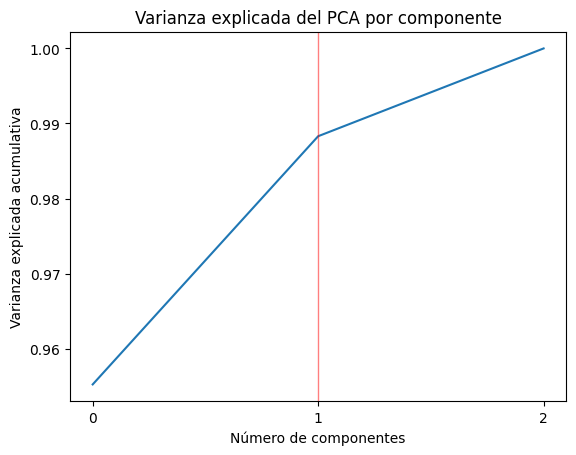

In [ ]:
def var_explicada():
    import numpy as np
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Número de componentes')
    plt.ylabel('Varianza explicada acumulativa')
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Varianza explicada del PCA por componente')
    show()

var_explicada()



---



#Ejercicio 5

In [ ]:
import numpy as np

X=np.array([[1,0,0,0],[1,1,0,0],[1,1,1,0],[1,1,1,1]])
X

#Matriz de cov
X_media = X - np.mean(X , axis = 0)
S = np.cov(X_media, rowvar = False)
print(S)

[[0.         0.         0.         0.        ]
 [0.         0.25       0.16666667 0.08333333]
 [0.         0.16666667 0.33333333 0.16666667]
 [0.         0.08333333 0.16666667 0.25      ]]


In [ ]:
# Vamos a calcular eigenvalores y eigenvectores
eigen_val, eigen_vec = np.linalg.eigh(S)
eigen_val

A=np.array([[3,2,1],[2,4,2],[1,2,3]])
A

array([[3, 2, 1],
       [2, 4, 2],
       [1, 2, 3]])

In [ ]:
#Matriz de cov
A_media = A - np.mean(A , axis = 0)
SA = np.cov(A_media, rowvar = False)
print(SA)

[[ 1.          0.         -1.        ]
 [ 0.          1.33333333  0.        ]
 [-1.          0.          1.        ]]


In [ ]:
# Vamos a calcular eigenvalores y eigenvectores

eigen_val, eigen_vec = np.linalg.eigh(SA)
eigen_val
#por lo tanto sacar los eigenvalores de X no implica sacar los de A pues son de diferentes dimensiones


array([0.        , 1.33333333, 2.        ])

In [ ]:
"""#segundo eje principal

"""

# Información total

eigen_val_total = sum(eigen_val)

varianza_explicada = [(i/ eigen_val_total )*100 for i in range(1,3) ]

varianza_explicada = np.round(varianza_explicada, 2)

varianza_explicada_acumulada = np.cumsum(varianza_explicada)

print("Varianza explicada: {}".format(varianza_explicada))

print("Varianza explicada acumulada: {}".format(varianza_explicada_acumulada)) #porcentaje de informacion dependiendo la columna

X_media = X - np.mean(X , axis = 0)

cov_mat = np.cov(X_media , rowvar = False)

eigen_val , eigen_vec = np.linalg.eigh(cov_mat)

sorted_index = np.argsort(eigen_val)[::-1]
sorted_eigenval = eigen_val[sorted_index]
sorted_eigenvec = eigen_vec[:,sorted_index]

eigenvector_ = sorted_eigenvec[:,1]
#segundo eje principal
segundo_ejep = sorted_eigenvec[:, 1]
print("segundo eje principal")
segundo_ejep

Varianza explicada: [30. 60.]
Varianza explicada acumulada: [30. 90.]
segundo eje principal


array([-0.00000000e+00, -7.07106781e-01,  2.77555756e-16,  7.07106781e-01])

In [ ]:
print("PCA")
X_red = np.dot(eigenvector_.transpose() , X_media.transpose() ).transpose()

X_red

PCA


array([ 0.35355339, -0.35355339, -0.35355339,  0.35355339])

In [ ]:
# Proyectar de datos originales sobre segundo eje principal
proyecc = np.dot(X, sorted_eigenvec[:, :2])

In [ ]:
# coordenadas
print("Coordenadas sobre el segundo eje principal:")
print(proyecc)

Coordenadas sobre el segundo eje principal:
[[ 0.00000000e+00  0.00000000e+00]
 [-5.00000000e-01 -7.07106781e-01]
 [-1.20710678e+00 -7.07106781e-01]
 [-1.70710678e+00  2.22044605e-16]]




---



# Ejercicio 6

En 28 an ̃os, se han observado 4 estados metereol ́ogicos:

• ξ1 = precipitación en julio (en mm),

• ξ2 = temperatura media en julio (en C),

• ξ3 = velocidad media del viento en julio (en km/h),

• ξ4 = precipitación en septiembre (en mm).

In [ ]:
#Para estos datos tenemos la matriz de covarianzas:
S1=[140.017, 107.881, 139.068, 109.095,107.881,106.038,110.0439,82.627,139.068,110.0439,168.752,125.136,109.095,82.627,125.136,108.60]
S=np.array(S1)
S=S.reshape(4,4)
S

array([[140.017 , 107.881 , 139.068 , 109.095 ],
       [107.881 , 106.038 , 110.0439,  82.627 ],
       [139.068 , 110.0439, 168.752 , 125.136 ],
       [109.095 ,  82.627 , 125.136 , 108.6   ]])

In [ ]:
#Tenemos la matriz de correlaciones empíricas
mcorremp=[0.969,-0.102,0.194,0.116,0.907,-0.392,-0.106,-0.111,0.971,0.156,-0.157,0.092,0.943,0.252,0.092,-0.196]
corremp=np.array(mcorremp)
corremp= corremp.reshape(4,4)
corremp

array([[ 0.969, -0.102,  0.194,  0.116],
       [ 0.907, -0.392, -0.106, -0.111],
       [ 0.971,  0.156, -0.157,  0.092],
       [ 0.943,  0.252,  0.092, -0.196]])

In [ ]:
#Para el ejercicio necesitamos los eigenvalores y vectores de la matriz de covarianzas
eval, evec = np.linalg.eigh(S)
eval = eval[np.argsort(eval)[::-1]]
evec = evec[:,np.argsort(eval)[::-1]]

In [ ]:
#Matriz de covarianzas entre variables y componentes
ccx1=np.dot(evec[0],eval[0])
ccx2=np.dot(evec[1],eval[1])
ccx3=np.dot(evec[2],eval[2])
ccx4=np.dot(evec[3],eval[3])
ccx= np.array([ccx1,ccx2,ccx3,ccx4])
ccx = ccx.reshape(4,4)
ccx=ccx.transpose()

In [ ]:
#Calculamos los coeficientes de correlación entre las variables orginales y las componentes principales
corrx1=ccx[:,0]/np.sqrt((S[0][0]*eval[0]))
corrx2=ccx[:,1]/np.sqrt((S[1][1]*eval[1]))
corrx3=ccx[:,2]/np.sqrt((S[2][2]*eval[2]))
corrx4=ccx[:,3]/np.sqrt((S[3][3]*eval[3]))
corrx= np.array([ccx1,corrx2,corrx3,corrx4])
corrx = corrx.reshape(4,4)
corrx=corrx.transpose()

In [ ]:
#Partes de la varianza explicada por las 4 componentes principales
rcuadrada_1=np.dot((evec[0]**2),eval[0])/S[0][0]
rcuadrada_2=np.dot((evec[1]**2),eval[1])/S[1][1]
rcuadrada_3=np.dot((evec[2]**2),eval[2])/S[2][2]
rcuadrada_4=np.dot((evec[3]**2),eval[3])/S[3][3]
rcuadrada=np.array([rcuadrada_1,rcuadrada_2,rcuadrada_3,rcuadrada_4])
rcuadrada=rcuadrada.transpose()
corrx**2


array([[4.69097264e+04, 3.72332062e-02, 1.10340953e-02, 3.94353409e-02],
       [1.04386217e+05, 3.02433013e-02, 2.34121316e-02, 6.20109069e-03],
       [1.13649862e+04, 1.55562138e-01, 1.02637768e-02, 1.82618619e-02],
       [6.23667365e+04, 5.01616145e-02, 2.25303393e-02, 1.63930259e-02]])

In [ ]:
#1. La varianza empírica de los componentes principales como la suma de los
#rcuadrada valores por la varianza de su variable
var1= sum(S[i][i]*rcuadrada[i][0] for i in range(0,4))
var2= sum(S[i][i]*rcuadrada[i][1] for i in range(0,4))
var3= sum(S[i][i]*rcuadrada[i][2] for i in range(0,4))
var4= sum(S[i][i]*rcuadrada[i][3] for i in range(0,4))
varempcp=np.array([var1,var2,var3,var4])
print('La varianza empírica de las componentes principales es' ,varempcp)

La varianza empírica de las componentes principales es [396.38610945  40.11919419   8.20636425  11.04117772]


In [ ]:
#2.Parte de la varianza de e1 explicada por las dos últimas componentes principales
varexdu= (varempcp[2]+varempcp[3])/np.trace(S)
# Y la parte de la varianza de e1 explicada por las primeras dos componentes
varexpd= (varempcp[0]+varempcp[1])/np.trace(S)
print('La varianza de e1 explicada por las dos últimas componentes principales es:',varexdu)
print('la varianza de e1 explicada por las primeras dos componentes principales es:',varexpd)


La varianza de e1 explicada por las dos últimas componentes principales es: 0.036773566207830025
la varianza de e1 explicada por las primeras dos componentes principales es: 0.8339691743505554


In [ ]:
#3.Proyección de las variables sobre los dos primeros ejes principales
corvar1= corrx[:,0]
corvar2= corrx[:,1]
proyvar1 = corvar1 * np.sqrt(eval[0])
proyvar2 = corvar2 * np.sqrt(eval[1])
print('La proyección de las variables sobre el primer eje principal es:',proyvar1, 'y la proyección sobre el segundo eje principal es:', proyvar2)

La proyección de las variables sobre el primer eje principal es: [-4717.26668447 -7036.88671607 -2321.89959025 -5439.20576782] y la proyección sobre el segundo eje principal es: [ 1.03857182  0.9360217  -2.12286936 -1.20547184]




---



# Ejercicio 8


---


En el archivo tortugas.txt 2 se encuentran tres variables, largo, ancho y alto,de los caparazones de 48 tortugas pintadas, 24 hembras y 24 machos. Toma logaritmos de las tres variables. Estime el vector medio y la matriz de covarianza de las tortugas macho y de las tortugas hembra por separado Encuentre los valores propios y los vectores propios de cada matriz de covarianza estimada y realice un PCA de cada conjunto de datos. Encuentra una expresión para el volumen del caparazón de una tortuga para machos y hembras. (Sugerencia: use el hecho de que las variables son logaritmos de las medidas originales).
Compare los volúmenes de los caparazones de machos y hembras.

In [ ]:
import pandas as pd
import numpy as np

# Datos de Iris de Fisher
url = "https://web.stanford.edu/class/bios221/data/PaintedTurtles.txt"
datos = pd.read_csv(url,delimiter="\t")

In [ ]:
#Aplicación logaritmo a los datos
ln_len=datos['length '].apply(np.log)
ln_w=datos['width '].apply(np.log)
ln_h=datos['height'].apply(np.log)

#Creación de la tabla de datos con logaritmo
datos_ln=pd.concat([ datos['sex '],ln_len , ln_w, ln_h] , axis = 1)

**Datos tortugas (con ln aplicado)**

In [ ]:
datos_ln

,sex,length,width,height
0,f,4.584967,4.394449,3.637586
1,f,4.634729,4.430817,3.637586
2,f,4.634729,4.454347,3.737670
3,f,4.653960,4.454347,3.688879
4,f,4.691348,4.477337,3.784190
5,f,4.812184,4.521789,3.912023
6,f,4.812184,4.553877,3.828641
7,f,4.890349,4.595120,3.931826
8,f,4.890349,4.624973,3.931826
9,f,4.890349,4.624973,3.931826


In [ ]:
#Separación de los datos según el sexo de las tortugas

datos_f = datos_ln.loc[datos_ln['sex '] == 'f ']  # → datos femeninos
datos_m = datos_ln.loc[datos_ln['sex '] == 'm ']  # → datos masculinos

datos_f1=pd.DataFrame(datos_f [['length ','width ','height']])
datos_m1=pd.DataFrame(datos_m [['length ','width ','height']])

In [ ]:
datos_f = datos_f1.to_numpy()
datos_m=datos_m1.to_numpy()

In [ ]:
#Obteniendo vector de medias por cada tabla

media_f=datos_f-np.mean(datos_f, axis = 0) # → datos femeninos
media_m=datos_m-np.mean(datos_m, axis = 0) # → datos masculinos

#Obteniendo matrices de Covarianzas

S_f=np.cov(media_f,rowvar=False)
S_m=np.cov(media_m,rowvar=False)

In [ ]:
#Encontrando eigenvalores y eigenvectores

eigen_val_f, eigen_vec_f = np.linalg.eigh(S_f)
eigen_val_m, eigen_vec_m = np.linalg.eigh(S_m)


In [ ]:
#Aplicando Cámara de Weyl
eigen_val_f_weyl=eigen_val_f[::-1]
eigen_val_m_weyl=eigen_val_m[::-1]

In [ ]:
eigen_vec_f_weyl=eigen_vec_f[:,np.argsort(eigen_val_f)[::-1]]
eigen_vec_m_weyl=eigen_vec_m[:,np.argsort(eigen_val_m)[::-1]]

In [ ]:
#Utilizando 2 componentes

n_components = 2
eigenvector_f2 = eigen_vec_f_weyl[:,0:n_components]
eigenvector_m2 = eigen_vec_m_weyl[:,0:n_components]

In [ ]:
#Realizando la descomposición espectral para obtener la matriz reducida
datos_f_red = np.dot(eigenvector_f2.transpose(),media_f.transpose()).transpose()
datos_m_red = np.dot(eigenvector_m2.transpose(),media_m.transpose()).transpose()

**PCA para tortugas hembra**

In [ ]:
f_red = pd.DataFrame(datos_f_red , columns = ['PC1','PC2'])
f_red

,PC1,PC2
0,0.491814,0.001752
1,0.443245,-0.036014
2,0.370284,0.033017
3,0.388332,-0.014156
4,0.295304,0.034322
5,0.119952,0.061507
6,0.155715,-0.017488
7,0.023633,0.011044
8,0.009182,-0.001364
9,0.009182,-0.001364


**PCA para tortugas macho**

In [ ]:
m_red = pd.DataFrame(datos_m_red , columns = ['PC1','PC2'])
m_red

,PC1,PC2
0,0.268473,0.061069
1,0.263345,-0.015724
2,0.236046,-0.034121
3,0.119923,0.014125
4,0.120728,-0.014957
5,0.152593,-0.008908
6,0.106039,0.016571
7,0.093027,0.013533
8,0.106371,-0.001245
9,0.006575,-0.016744


Ahora, para calcular el volumen de los caparazones de tortugas utilizaremos:
\begin{equation}
  largo \times ancho \times alto
\end{equation}
Pero nótese que al haberle aplicado a estas variables el logaritmo natural, entonces simplemente podemos sumarlas:
\begin{equation}
 \ln{largo} + \ln{ancho} + \ln{alto}
\end{equation}

Por lo tanto:

In [ ]:
volumen_f = pd.DataFrame(datos_f1.sum(numeric_only=True,axis=1) , columns = ['Volumen Hembras'])
volumen_f

,Volumen Hembras
0,12.617003
1,12.703132
2,12.826746
3,12.797187
4,12.952874
5,13.245996
6,13.194703
7,13.417295
8,13.447148
9,13.447148


In [ ]:
volumen_m = pd.DataFrame(datos_m1.sum(numeric_only=True,axis=1) ,columns = ['Volumen Machos'])
volumen_m

,Volumen Machos
24,12.447582
25,12.455352
26,12.501723
27,12.709499
28,12.705210
29,12.640096
30,12.726793
31,12.745841
32,12.717134
33,12.896015
